In [1]:
#!pip install tensorflow
import tensorflow as tf
from tensorflow.keras import layers, models
import os

In [2]:
import kagglehub

# Download latest version of the dataset
path = kagglehub.dataset_download("swoyam2609/fresh-and-stale-classification")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/fresh-and-stale-classification


In [3]:
# Paths
train = '/kaggle/input/fresh-and-stale-classification/dataset/Train'
test = '/kaggle/input/fresh-and-stale-classification/dataset/Test'

# Define train (10901)
train_ds = tf.keras.utils.image_dataset_from_directory(
    train,
    image_size=(150, 150),
    batch_size=32
)

# Define test (2698)
test_ds = tf.keras.utils.image_dataset_from_directory(
    test,
    image_size=(150, 150),
    batch_size=32
)

Found 23619 files belonging to 18 classes.
Found 6738 files belonging to 14 classes.


In [4]:
# Convert to binary classification for fresh vs. rotten
def binary_conversion(images, labels):
    binary_labels = tf.where(labels < 3, 0, 1)  # 0 for 'fresh', 1 for 'rotten'
    return images, binary_labels

# Apply mapping - notice no parentheses after binary_conversion
train_ds = train_ds.map(binary_conversion)
test_ds = test_ds.map(binary_conversion)

In [5]:
# Scale image pixel values [0, 1]
normalized = layers.Rescaling(1./255)

train_ds = train_ds.map(lambda x, y: (normalized(x), y))
test_ds = test_ds.map(lambda x, y: (normalized(x), y))

In [7]:
 #CNN model
model = models.Sequential([
    layers.Input(shape=(150, 150, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification output
])

In [8]:
# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # For binary classification
    metrics=['accuracy']
)

In [9]:
# Split training data into train and validation
train_size = int(0.8 * len(train_ds))
train_dataset = train_ds.take(train_size)
val_dataset = train_ds.skip(train_size)

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10
)

Epoch 1/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 1055s 2s/step - accuracy: 0.8489 - loss: 0.3887 - val_accuracy: 0.9626 - val_loss: 0.0975
Epoch 2/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 1044s 2s/step - accuracy: 0.9717 - loss: 0.0785 - val_accuracy: 0.9647 - val_loss: 0.0956
Epoch 3/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 1065s 2s/step - accuracy: 0.9773 - loss: 0.0619 - val_accuracy: 0.9722 - val_loss: 0.0724
Epoch 4/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 1037s 2s/step - accuracy: 0.9859 - loss: 0.0416 - val_accuracy: 0.9841 - val_loss: 0.0454
Epoch 5/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 1013s 2s/step - accuracy: 0.9876 - loss: 0.0321 - val_accuracy: 0.9828 - val_loss: 0.0450
Epoch 6/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 1060s 2s/step - accuracy: 0.9885 - loss: 0.0314 - val_accuracy: 0.9917 - val_loss: 0.0273
Epoch 7/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 1028s 2s/step - accuracy: 0.9945 - loss: 0.0186 - val_accuracy: 0.9917 - val_loss: 0.0271
Epoch 8/10
591/591 ━━━━━━━━━━━━━━━━━━━━ 1017s 2s/step - accuracy: 0.9911 - loss: 0.0242 - 

In [10]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test accuracy: {test_accuracy}")

211/211 ━━━━━━━━━━━━━━━━━━━━ 117s 552ms/step - accuracy: 0.9473 - loss: 0.9707
Test accuracy: 0.9496883153915405


In [11]:
# Save the trained model
model.save("Mini_Spoilage_Detection_Model.keras")

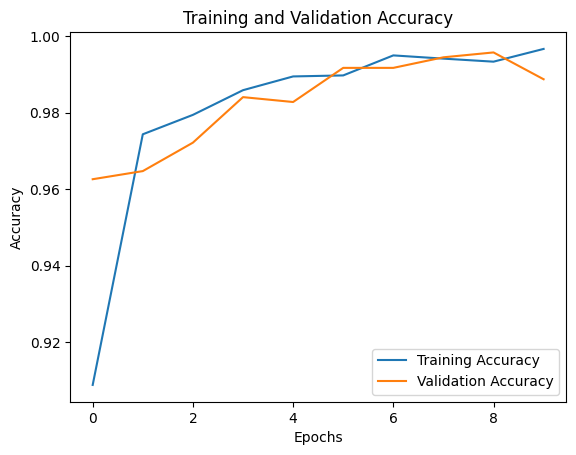

In [12]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

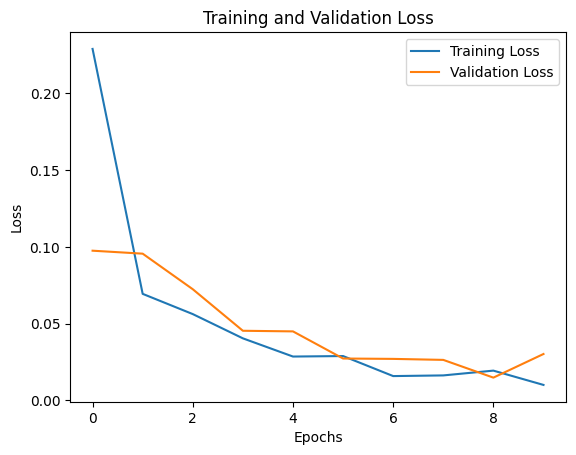

In [13]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

211/211 ━━━━━━━━━━━━━━━━━━━━ 103s 488ms/step - accuracy: 0.9466 - loss: 0.9940
Training Accuracy: 0.9967
Validation Accuracy: 0.9887
Test Accuracy: 0.9497


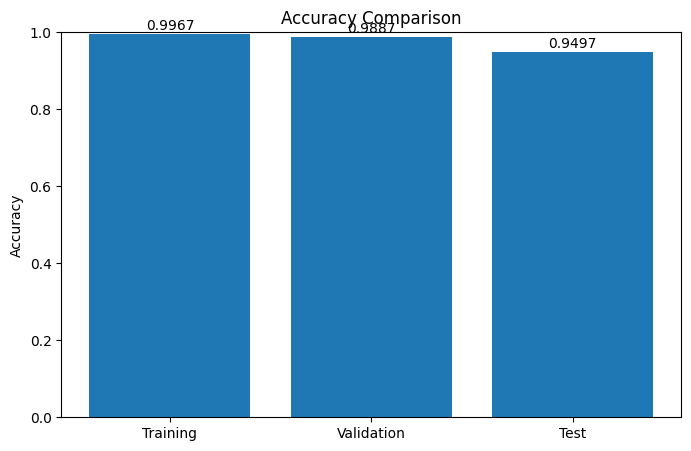

In [14]:
# Get training accuracy from the last epoch
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

# Get test accuracy
test_loss, test_accuracy = model.evaluate(test_ds)

# Print all accuracies
print(f"Training Accuracy: {final_train_accuracy:.4f}")
print(f"Validation Accuracy: {final_val_accuracy:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

# Optional: Create a bar plot to visualize the comparison
plt.figure(figsize=(8, 5))
accuracies = [final_train_accuracy, final_val_accuracy, test_accuracy]
labels = ['Training', 'Validation', 'Test']

plt.bar(labels, accuracies)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis from 0 to 1
# Add value labels on top of each bar
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')

plt.show()